theta 0
theta 1
theta 2
theta 3
theta 4
theta 5
theta 6
theta 7
theta 8
theta 9
theta 10
theta 11
theta 12
theta 13
theta 14
theta 15
theta 16
theta 17
theta 18
theta 19


(0.0, 1.0)

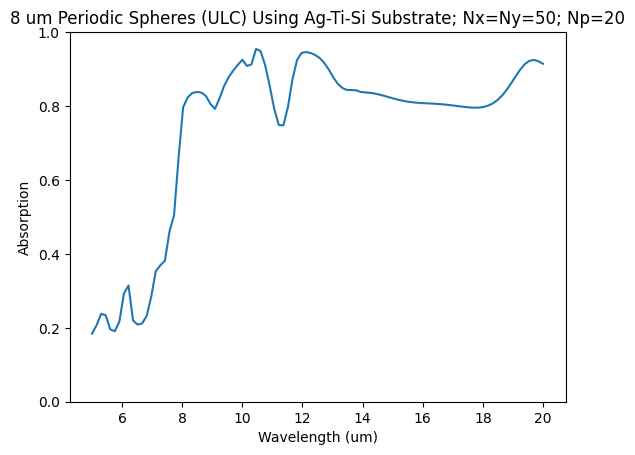

In [ ]:
from beads import beads
import numpy as np
import matplotlib.pyplot as plt
from refractiveindex import RefractiveIndexMaterial

nm_to_um = 1e-3

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

""" dev_structure = [
    ('air',0.0,'slab'),
    (SiO2,0.5,'slab'),
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'), 
    ('air',0.0,'slab')
] """

dev_structure = [
    ('air',0.0,'slab'), 
    (SiO2,9,'honeycomb'), 
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'),
    ('air',0.0,'slab') 
]

diameter = 9 # um
wv_sweep = np.linspace(5, 20, num=100, endpoint=True) + 0.000001

Rs, Ts, As = beads(wv_sweep, nG=20, theta_start=0, theta_end=80, n_theta=20, 
                   theta_sweep=True, Nx=50, Ny=50, Np=25, structure=dev_structure,
                   diameter=diameter)

plt.plot(wv_sweep, As)
plt.xlabel("Wavelength (um)")
plt.ylabel("Absorption")
plt.title("9 um Periodic Spheres (ULC) Using Ag-Ti-Si Substrate; Nx=Ny=50; Np=25")
plt.ylim(0, 1)